In [2]:
import zipfile

with zipfile.ZipFile("/content/rap/archive.zip",'r') as zipref:
  zipref.extractall("/content/rap")

In [3]:
import tensorflow as tf
import os

In [4]:
import cv2
import imghdr

In [5]:
data_dir='/content/rap/brain_tumor_dataset'

In [6]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [7]:
import numpy as np

from matplotlib import pyplot as plt

In [8]:
data=tf.keras.utils.image_dataset_from_directory('/content/rap/brain_tumor_dataset')

Found 253 files belonging to 2 classes.


In [9]:
data_iterator= data.as_numpy_iterator()

In [10]:
batch=data_iterator.next()

In [11]:
batch[1]

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int32)

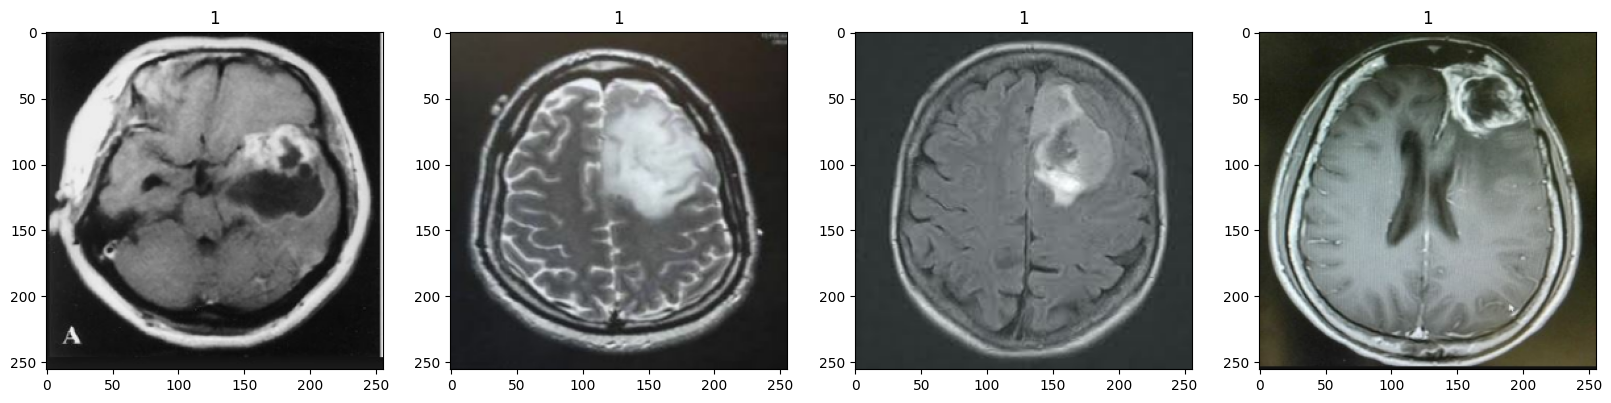

In [12]:
fig, ax = plt.subplots (ncols =4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
     ax[idx].imshow(img.astype(int))
     ax[idx].title.set_text(batch[1][idx])

In [13]:
data=data.map(lambda x,y:(x/255,y))

In [14]:
scaled_iterator= data.as_numpy_iterator()
batch = scaled_iterator.next()

In [15]:
batch[0].max()

1.0

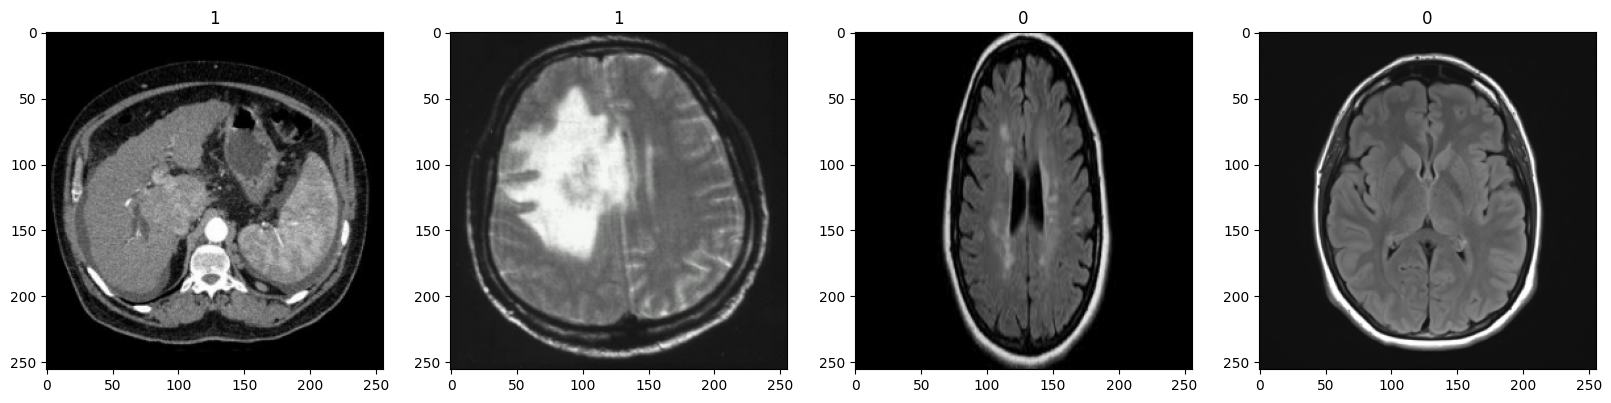

In [17]:
fig, ax = plt.subplots (ncols =4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
     ax[idx].imshow(img)
     ax[idx].title.set_text(batch[1][idx])

In [18]:
len(data)

8

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [20]:
train_size+val_size+test_size

8

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
len(train)+len(val)+len(test)

8

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
model=Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D() )

model.add(Conv2D(32, (3,3), 1, activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))

model. add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [29]:
logdir="/content/logs"

In [30]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
5/5 [==============================] - 14s 206ms/step - loss: 0.6844 - accuracy: 0.6875 - val_loss: 1.2024 - val_accuracy: 0.7031
Epoch 2/30
5/5 [==============================] - 1s 157ms/step - loss: 0.7130 - accuracy: 0.7250 - val_loss: 0.5574 - val_accuracy: 0.7188
Epoch 3/30
5/5 [==============================] - 1s 150ms/step - loss: 0.5099 - accuracy: 0.8062 - val_loss: 0.4531 - val_accuracy: 0.8438
Epoch 4/30
5/5 [==============================] - 2s 363ms/step - loss: 0.4047 - accuracy: 0.8625 - val_loss: 0.3872 - val_accuracy: 0.8281
Epoch 5/30
5/5 [==============================] - 2s 206ms/step - loss: 0.3400 - accuracy: 0.8500 - val_loss: 0.3147 - val_accuracy: 0.8438
Epoch 6/30
5/5 [==============================] - 1s 165ms/step - loss: 0.3410 - accuracy: 0.8562 - val_loss: 0.2699 - val_accuracy: 0.9062
Epoch 7/30
5/5 [==============================] - 1s 203ms/step - loss: 0.2666 - accuracy: 0.9062 - val_loss: 0.2219 - val_accuracy: 0.8906
Epoch 8/30
5/5 [===

In [32]:
hist.history

{'loss': [0.6844221353530884,
  0.7130277156829834,
  0.5098539590835571,
  0.4047340452671051,
  0.3400137424468994,
  0.3410188555717468,
  0.2665899097919464,
  0.1783178150653839,
  0.19660869240760803,
  0.11126372963190079,
  0.09201923757791519,
  0.09715919196605682,
  0.06799539178609848,
  0.05370960384607315,
  0.041242584586143494,
  0.02690366469323635,
  0.017169084399938583,
  0.006541850510984659,
  0.007891533896327019,
  0.014665618538856506,
  0.026092741638422012,
  0.01973169669508934,
  0.0077533721923828125,
  0.005373113788664341,
  0.006031679455190897,
  0.0015969278756529093,
  0.0011535624507814646,
  0.001078532193787396,
  0.0006110471440479159,
  0.000559337146114558],
 'accuracy': [0.6875,
  0.7250000238418579,
  0.8062499761581421,
  0.862500011920929,
  0.8500000238418579,
  0.856249988079071,
  0.90625,
  0.9437500238418579,
  0.925000011920929,
  0.981249988079071,
  0.9750000238418579,
  0.9750000238418579,
  0.987500011920929,
  0.981249988079071,


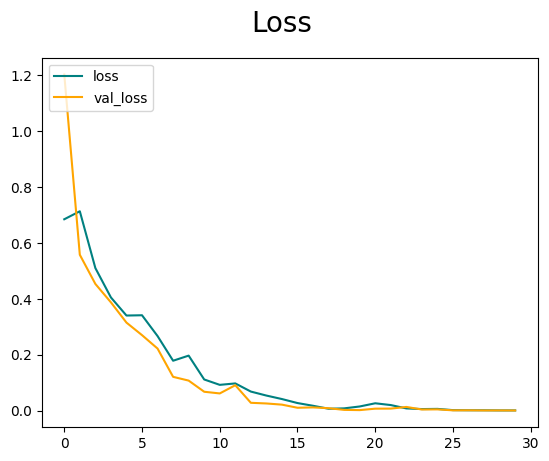

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

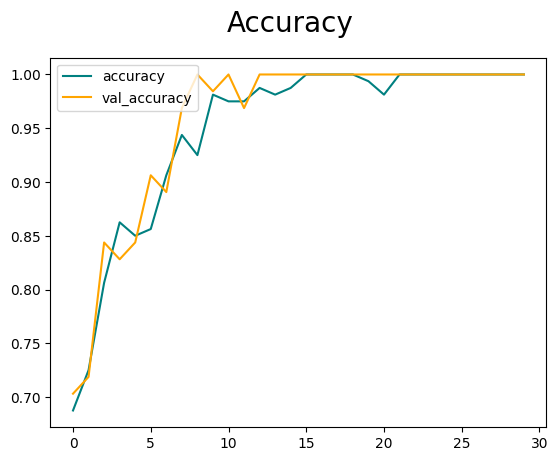

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [37]:
from tensorflow.keras.models import load_model

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
  X, y= batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 1s 507ms/step


In [41]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [42]:
import cv2

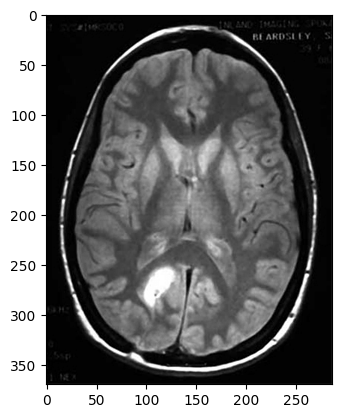

In [43]:
img=cv2.imread('/content/a-Original-MRI-brain-tumor-image-b-Colored-MRI-image.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

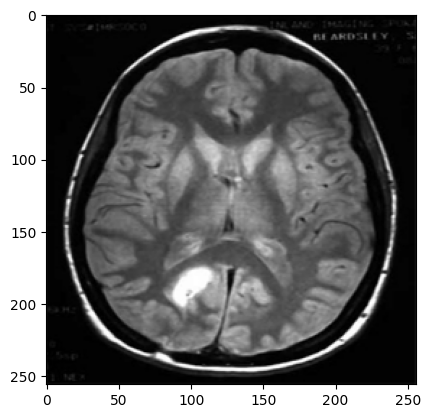

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 344ms/step


In [48]:
yhat

array([[0.99999714]], dtype=float32)

In [50]:
if yhat<0.5:
  print("no brain tumor")
else:
  print(" brain tumor")

 brain tumor


In [51]:
from tensorflow.keras.models import load_model

In [53]:
model.save('/content/losalmos/los.hdf5')